# Padding and stride

The step size of the kernel can be controlled using the **stride** parameter. A large stride along with a large kernel size can be useful if objects are large relative to the dimension of the image. Note that strided convolutions can be used as an alternative way to downsample an image (where it is shown to work better or just as well as the usual conv + pooling layers for certain benchmark tasks) {cite}`allconv`. Hence, stride significantly reduces computation of the layer (i.e. by the same factor). For example, `stride=2` divides the spatial size of the original image by 2:

In [1]:
from chapter import *
from torchvision.io import read_image
import torchvision.transforms.functional as fn

cat = DATASET_DIR / "shorty.png"
X = read_image(str(cat)).unsqueeze(0)[:, :3, :, :]
X = fn.resize(X, size=(128, 128)) / 255.

In [2]:
conv = lambda s: nn.Conv2d(3, 1, stride=s, kernel_size=3)

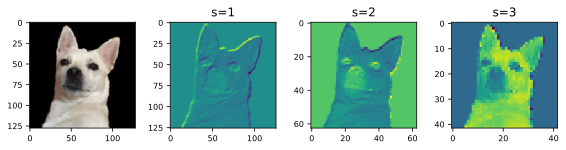

In [3]:
fig, ax = plt.subplots(1, 4, figsize=(8, 2))
ax[0].imshow(X[0].permute(1, 2, 0))
ax[1].imshow(conv(1)(X)[0, 0].detach().numpy()); ax[1].set_title("s=1")
ax[2].imshow(conv(2)(X)[0, 0].detach().numpy()); ax[2].set_title("s=2")
ax[3].imshow(conv(3)(X)[0, 0].detach().numpy()); ax[3].set_title("s=3")
for i in range(4):
    ax[i].tick_params(axis="both", which="major", labelsize=8)
    
fig.tight_layout();

<br>

**Padding.** Edge pixels of an input image are underrepresented since the kernel has to be kept within the input image. Moreover, information in the edges become lost as we stack more convolutional layers. The simplest idea is **zero padding** the boundaries (more involved variants exist). Observe the weird effect it has on the boundaries:

In [4]:
pad  = nn.ZeroPad2d(padding=3)
conv = nn.Conv2d(3, 1, kernel_size=3)

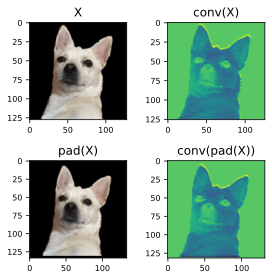

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(4, 4))
vmin = min(conv(X).min(), conv(pad(X)).min())
vmax = max(conv(X).max(), conv(pad(X)).max())
ax[1, 0].imshow(pad(X)[0].permute(1, 2, 0).detach(), vmin=vmin, vmax=vmax); ax[1, 0].set_title("pad(X)")
ax[1, 1].imshow(conv(pad(X))[0, 0].detach(),         vmin=vmin, vmax=vmax); ax[1, 1].set_title("conv(pad(X))")
ax[0, 0].imshow(X[0].permute(1, 2, 0).detach(),      vmin=vmin, vmax=vmax); ax[0, 0].set_title("X")
ax[0, 1].imshow(conv(X)[0, 0].detach(),              vmin=vmin, vmax=vmax); ax[0, 1].set_title("conv(X)")
ax[0, 0].tick_params(axis="both", which="major", labelsize=8)
ax[0, 1].tick_params(axis="both", which="major", labelsize=8)
ax[1, 0].tick_params(axis="both", which="major", labelsize=8)
ax[1, 1].tick_params(axis="both", which="major", labelsize=8)
fig.tight_layout();

<br>

**Remark.** Padding and stride determine the output shape. A convolution layer with kernel size `k` and stride `s` applied to an input of width `w` with symmetric padding `p`, results in an output width of `⌊(w + 2p - k)/s + 1⌋`. In general, we want to pick stride and padding values so that the kernel can be placed evenly in the image with no input pixel dropped.

For `s = 1`, the kernel size should be odd so that it covers the entire input in a symmetric manner. A common choice is `p = (k - 1)/2` which results in same sized outputs[^1] (**same convolution**). For `s > 1`, best practice is to choose a kernel size and the smallest `p` such that `s` divides `w + 2p - k` so that the entire input image is symmetrically covered by the kernel.

[^1]: The kernel `p` pixels on the left side of a kernel at the start, and `p` on the right at the other end, where `p = (k - 1) / 2` and the kernel is centered on the central pixel (i.e. the `-1`).